# Create Random DataSet - Label them 1 and 0
## Perceptron training - Find decistion boundary
## Note: Each run will generate different results

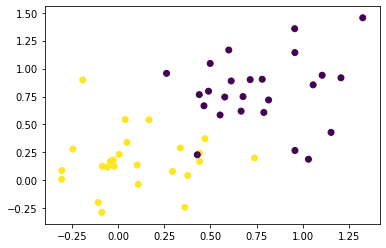

Data generated randomly


In [36]:
# Generate Data

#!/usr/bin/env python3
"""
This code will generate random data points and put labels as 1 and 0

Running this file will replace the file ./binary_classification_data.pkl each time
with a new one, and it's unlikely they will be the same.
"""

import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import os

set1 = np.random.normal(0.2, 0.3, (25, 2))
set2 = np.random.normal(0.8, 0.3, (25, 2))

data = np.append(set1, set2, axis=0)

# close to origin = 0
# far away = 1
labels = np.asarray([1] * 25 + [0] * 25)

pkl.dump((data, labels), open("./binary_classification_data.pkl", "wb"))

inp, lb = pkl.load(open("./binary_classification_data.pkl", "rb"))
plt.scatter(inp[:, 0], inp[:, 1], c=lb)
plt.show()

print('Data generated randomly')

 Cost: 0.01 Accuracy: 52.00%
 Cost: 0.10 Accuracy: 88.00%
 Cost: 0.06 Accuracy: 92.00%
 Cost: 0.04 Accuracy: 94.00%
 Cost: 0.03 Accuracy: 94.00%
 Cost: 0.03 Accuracy: 96.00%
 Cost: 0.02 Accuracy: 96.00%
 Cost: 0.02 Accuracy: 96.00%
 Cost: 0.02 Accuracy: 96.00%
 Cost: 0.02 Accuracy: 96.00%
 Cost: 0.01 Accuracy: 96.00%
 Cost: 0.01 Accuracy: 96.00%
 Cost: 0.01 Accuracy: 96.00%
 Cost: 0.01 Accuracy: 96.00%
 Cost: 0.01 Accuracy: 96.00%
 Cost: 0.01 Accuracy: 96.00%


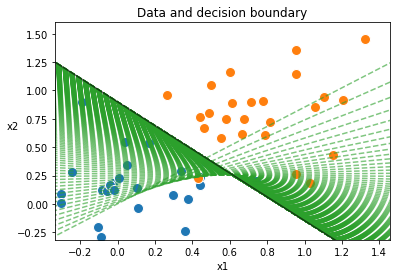

In [38]:
#!/usr/bin/env python3
"""
Simple 
"""
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt


class LinearModel:
    def __init__(self, num_inputs, learning_rate):
        """
        Model is Perceptron
        (1) the bias is indexed by w(n+1) rather than w(0), and
        (2) the activation function is a (continuous) sigmoid rather than a (discrete) step function.

        x1 ----> * w1 ----\
        x2 ----> * w2 -----\
        x3 ----> * w3 ------\
        ...
                             \
        xn ----> * wn -------+--> s --> activation ---> z
        1  ----> * w(n+1) --/
        """
        self.num_inputs = num_inputs
        self.lr = learning_rate
        self.weights = np.asarray([1.0, -1.0, 0.0])  # Initialize as straight line

    def activation(self, x):
        """
        a sigmoid activation function that accepts a float and returns
        a float, but raises a Value error if a boolean, list or numpy array is passed in
        """
        try:
            return 1 / (1 + np.exp(-x))
        except ValueError:
            print('x is not a float')

    def forward(self, inputs):
        """
        forward pass (inference) of the model.
        inputs is a numpy array. The bias term is the last element in self.weights.
        """
        return self.activation(np.dot(inputs, self.weights[:-1]) + self.weights[-1])

    @staticmethod
    def loss(prediction, label):
        """
        Return the cross entropy for the given prediction and label
        """
        # E = −t log(z)−(1−t)log(1−z)
        return -(label * np.log(prediction) - (1 - label) * np.log(1- prediction))

    @staticmethod
    def error(prediction, label):
        """
        Return the difference between the label and the prediction

        For example, if label= 1 and the prediction was 0.8, return 0.2
                     if label= 0 and the preduction was 0.43 return -0.43
        """
        return label - prediction

    def backward(self, inputs, diff):
        """
        Adjust self.weights by gradient descent

        We take advantage of the simplification to compute the gradient directly from 
        the differential or difference
        dE/ds = z - t (which is passed in as diff)

        The resulting weight update should look essentially the same as for the
        Perceptron Learning Rule (shown in Lectures 1c, slide 11) except that
        the error can take on any continuous value between -1 and +1,
        rather than being restricted to the integer values -1, 0 or +1.

        Note: Numpy arrays are passed by reference and can be modified in-place
        """
        self.weights[:-1] += self.lr * diff * inputs 
        self.weights[-1] += self.lr * diff

    def plot(self, inputs, marker):
        """
        Plot the data and the decision boundary
        """
        xmin = inputs[:, 0].min() * 1.1
        xmax = inputs[:, 0].max() * 1.1
        ymin = inputs[:, 1].min() * 1.1
        ymax = inputs[:, 1].max() * 1.1

        x = np.arange(xmin * 1.3, xmax * 1.3, 0.1)
        plt.scatter(inputs[:25, 0], inputs[:25, 1], c="C0", edgecolors='w', s=100)
        plt.scatter(inputs[25:, 0], inputs[25:, 1], c="C1", edgecolors='w', s=100)

        plt.xlim((xmin, xmax))
        plt.ylim((ymin, ymax))
        plt.plot(x, -(self.weights[0] * x + self.weights[2]) / self.weights[1], marker, alpha=0.6)
        plt.title("Data and decision boundary")
        plt.xlabel("x1")
        plt.ylabel("x2").set_rotation(0)


# Let's check our model
inputs, labels = pkl.load(open("./binary_classification_data.pkl", "rb"))

epochs = 400
model = LinearModel(num_inputs=inputs.shape[1], learning_rate=0.01)

for i in range(epochs):
    num_correct = 0
    cost = 0
    for x, y in zip(inputs, labels):
        # Get prediction
        output = model.forward(x)

        # Calculate loss
        cost += model.loss(output, y)

        # Calculate difference or differential
        diff = model.error(output, y)

        # Update the weights
        model.backward(x, diff)

        # Record accuracy
        preds = output > 0.5  # 0.5 is midline of sigmoid
        num_correct += int(preds == y)
    # avoid printing eache epoch    
    if i%25 == 0: 
        print(f" Cost: {cost/len(inputs):.2f} Accuracy: {num_correct / len(inputs) * 100:.2f}%")
    model.plot(inputs, "C2--")
model.plot(inputs, "k")
plt.show()